Analisis del CO en el aire  de Bogota empleando series de tiempo

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pylab as plt
import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

## Cargar dataset


In [0]:
data = pd.read_csv('/content/drive/My Drive/simulacion/DATOS_DE_CALIDAD_DEL_AIRE_EN_COLOMBIA_2011-2017.csv')

In [0]:
#aire="/content/drive/My Drive/Colab Notebooks/DATOS_DE_CALIDAD_DEL_AIRE_EN_COLOMBIA_2011-2017.csv"
#data = pd.read_csv(aire)


In [0]:
d1=data.copy()

In [0]:
data.head()

,Fecha,Autoridad Ambiental,Nombre de la estación,Tecnología,Latitud,Longitud,Código del departamento,Departamento,Código del municipio,Nombre del municipio,Tipo de estación,Tiempo de exposición,Variable,Unidades,Concentración,Nueva columna georreferenciada
0,09/04/2011 12:00:00 a. m.,AMVA,BAR-Hosp. S.V. Paul,Manual,6.436,-75.333431,5,ANTIOQUIA,5079,BARBOSA,Fija,24,PM10,µg/m3,55.57,"(6.436, -75.333431)"
1,13/04/2011 12:00:00 a. m.,AMVA,BAR-Hosp. S.V. Paul,Manual,6.436,-75.333431,5,ANTIOQUIA,5079,BARBOSA,Fija,24,PM10,µg/m3,30.81,"(6.436, -75.333431)"
2,15/04/2011 12:00:00 a. m.,AMVA,BAR-Hosp. S.V. Paul,Manual,6.436,-75.333431,5,ANTIOQUIA,5079,BARBOSA,Fija,24,PM10,µg/m3,21.01,"(6.436, -75.333431)"
3,18/04/2011 12:00:00 a. m.,AMVA,BAR-Hosp. S.V. Paul,Manual,6.436,-75.333431,5,ANTIOQUIA,5079,BARBOSA,Fija,24,PM10,µg/m3,30.73,"(6.436, -75.333431)"
4,20/04/2011 12:00:00 a. m.,AMVA,BAR-Hosp. S.V. Paul,Manual,6.436,-75.333431,5,ANTIOQUIA,5079,BARBOSA,Fija,24,PM10,µg/m3,24.72,"(6.436, -75.333431)"


In [0]:
v=data["Variable"].unique()
(v,len(v))

(array(['PM10', 'Dirección del Viento', 'O3', 'Humedad Relativa 10 m',
        'Humedad Relativa 2 m', 'Presión Atmosférica',
        'Precipitación Líquida', 'Radiación Solar Global',
        'Temperatura a 10 m', 'Temperatura a 2 m', 'Velocidad del Viento',
        'PM2.5', 'NO', 'NO2', 'CO', 'PST', 'Temperatura', 'SO2',
        'Humedad Relativa', 'Radiación UVB'], dtype=object), 20)

In [0]:
v=d1["Nombre del municipio"].unique()
(v,len(v))

(array(['BARBOSA', 'BELLO', 'CALDAS', 'MEDELLÍN', 'COPACABANA', 'ENVIGADO',
        'LA ESTRELLA', 'SABANETA', 'GIRARDOTA', 'ITAGÜÍ', 'NEIVA',
        'BOGOTÁ. D.C.', 'CAJICÁ', 'COGUA', 'FUNZA', 'LA CALERA', 'MADRID',
        'MOSQUERA', 'NEMOCÓN', 'RÁQUIRA', 'SIBATÉ', 'SOACHA', 'SOPÓ',
        'TAUSA', 'TOCANCIPÁ', 'ZIPAQUIRÁ', 'DOSQUEBRADAS', 'LA VIRGINIA',
        'PEREIRA', 'SANTA ROSA DE CABAL', 'BUCARAMANGA', 'FLORIDABLANCA',
        'QUIBDÓ', 'AMAGÁ', 'AMALFI', 'ANDES', 'ANGELÓPOLIS', 'ANGOSTURA',
        'ANORÍ', 'ANZÁ', 'ARMENIA', 'BELMIRA', 'BETANIA', 'BETULIA',
        'BRICEÑO', 'BURITICÁ', 'CÁCERES', 'CAICEDO', 'CAMPAMENTO',
        'CARACOLÍ', 'CAROLINA', 'CISNEROS', 'CIUDAD BOLÍVAR', 'CONCORDIA',
        'EBÉJICO', 'GUADALUPE', 'DONMATÍAS', 'EL BAGRE', 'ENTRERRÍOS',
        'FREDONIA', 'GÓMEZ PLATA', 'HELICONIA', 'HISPANIA', 'ITUANGO',
        'JARDÍN', 'LA PINTADA', 'PUERTO NARE', 'LIBORINA', 'MACEO',
        'MONTEBELLO', 'NECHÍ', 'OLAYA', 'PUEBLORRICO', 'PUERTO BERRÍO

In [0]:
v=d1["Tipo de estación"].unique()
(v,len(v))

(array(['Fija', 'Indicativa'], dtype=object), 2)

In [0]:
v=d1["Autoridad Ambiental"].unique()
(v,len(v))

(array(['AMVA', 'CAM', 'CAR', 'CARDER', 'CDMB', 'CODECHOCÓ',
        'CORANTIOQUIA', 'CORMACARENA', 'CORNARE', 'CORPAMAG',
        'CORPOBOYACA', 'CORPOCALDAS', 'CORPOCESAR', 'CORPOGUAJIRA',
        'CORPONARIÑO', 'CORPONOR', 'CORPORINOQUIA', 'CORTOLIMA', 'CRA',
        'CRC', 'CRQ', 'CVC', 'CVS', 'DAGMA', 'EPA Barranquilla Verde',
        'EPA Cartagena', 'SDA'], dtype=object), 27)

## Seleccion y filtrado de datos

In [0]:
d1[d1["Nombre del municipio"]=="BOGOTÁ. D.C."].head()

,Fecha,Autoridad Ambiental,Nombre de la estación,Tecnología,Latitud,Longitud,Código del departamento,Departamento,Código del municipio,Nombre del municipio,Tipo de estación,Tiempo de exposición,Variable,Unidades,Concentración,Nueva columna georreferenciada
4832167,04/01/2011 12:00:00 a. m.,CAR,Bogotá-Mochuelo,Manual,4.530214,-74.142217,11,CUNDINAMARCA,11001,BOGOTÁ. D.C.,Fija,24,NO2,µg/m3,48.52,"(4.530213886, -74.14221714)"
4832168,06/01/2011 12:00:00 a. m.,CAR,Bogotá-Mochuelo,Manual,4.530214,-74.142217,11,CUNDINAMARCA,11001,BOGOTÁ. D.C.,Fija,24,NO2,µg/m3,40.13,"(4.530213886, -74.14221714)"
4832169,10/01/2011 12:00:00 a. m.,CAR,Bogotá-Mochuelo,Manual,4.530214,-74.142217,11,CUNDINAMARCA,11001,BOGOTÁ. D.C.,Fija,24,NO2,µg/m3,51.36,"(4.530213886, -74.14221714)"
4832170,14/01/2011 12:00:00 a. m.,CAR,Bogotá-Mochuelo,Manual,4.530214,-74.142217,11,CUNDINAMARCA,11001,BOGOTÁ. D.C.,Fija,24,NO2,µg/m3,57.20,"(4.530213886, -74.14221714)"
4832171,17/01/2011 12:00:00 a. m.,CAR,Bogotá-Mochuelo,Manual,4.530214,-74.142217,11,CUNDINAMARCA,11001,BOGOTÁ. D.C.,Fija,24,NO2,µg/m3,35.41,"(4.530213886, -74.14221714)"


In [0]:
Ciudad=d1[(d1["Nombre del municipio"]=="BOGOTÁ. D.C.")  & (d1["Variable"]=="CO")]
Ciudad.head()


,Fecha,Autoridad Ambiental,Nombre de la estación,Tecnología,Latitud,Longitud,Código del departamento,Departamento,Código del municipio,Nombre del municipio,Tipo de estación,Tiempo de exposición,Variable,Unidades,Concentración,Nueva columna georreferenciada
9483095,01/01/2011 01:00:00 a. m.,SDA,C. Alto Rendimiento,Automática,4.658467,-74.083967,11,CUNDINAMARCA,11001,BOGOTÁ. D.C.,Fija,1,CO,µg/m3,345.753970,"(4.658467, -74.083967)"
9483096,01/01/2011 02:00:00 a. m.,SDA,C. Alto Rendimiento,Automática,4.658467,-74.083967,11,CUNDINAMARCA,11001,BOGOTÁ. D.C.,Fija,1,CO,µg/m3,316.750364,"(4.658467, -74.083967)"
9483097,01/01/2011 03:00:00 a. m.,SDA,C. Alto Rendimiento,Automática,4.658467,-74.083967,11,CUNDINAMARCA,11001,BOGOTÁ. D.C.,Fija,1,CO,µg/m3,286.220174,"(4.658467, -74.083967)"
9483098,01/01/2011 04:00:00 a. m.,SDA,C. Alto Rendimiento,Automática,4.658467,-74.083967,11,CUNDINAMARCA,11001,BOGOTÁ. D.C.,Fija,1,CO,µg/m3,423.605857,"(4.658467, -74.083967)"
9483099,01/01/2011 05:00:00 a. m.,SDA,C. Alto Rendimiento,Automática,4.658467,-74.083967,11,CUNDINAMARCA,11001,BOGOTÁ. D.C.,Fija,1,CO,µg/m3,616.327403,"(4.658467, -74.083967)"


## Edicion de la fecha


In [0]:

t=Ciudad["Fecha"].str[-14:]
for n in t.index:
  if t[n][-6:]==" a. m.":
    t[n]=t[n][:-6]
  else:
    f=t[n][:2]
    f1=str(int(f)+12)
    if f1=="24":
      f1="00"
    t[n]=f1+t[n][2:-6]

t=Ciudad["Fecha"].str[:-14]+t
Ciudad["Fecha"]=t
Ciudadf=Ciudad
#Ciudadf

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
Ciudadf['Nombre de la estación'].unique()

array(['C. Alto Rendimiento', 'Carvajal - Sevillana', 'Fontibón',
       'Kennedy', 'Las Ferias', 'Puente Aranda', 'San Cristóbal', 'Tunal',
       'Usaquén'], dtype=object)

In [0]:
for j in Ciudad["Fecha"].str[-13:-9].unique():
  t1=Ciudad[Ciudad["Fecha"].str[-13:-9]==j]
  print(j)
  vec=np.array([])
  for i in t1["Fecha"].str[-16:-14].unique():
    t=Ciudad[Ciudad["Fecha"].str[-16:-9]==(i+"/"+j)]
    vec=np.append(vec,[len(t["Fecha"].str[:-9].unique())])
  print(vec)

2011
[31. 28. 31. 30. 31. 30. 31. 30. 31. 30. 31. 31.]
2012
[31. 29. 31. 30. 31. 30. 31. 31. 30. 31. 30. 31.]
2013
[31. 28. 31. 30. 31. 30. 31. 31. 30. 31. 30. 31.]
2014
[31. 28. 31. 30. 31. 31. 30. 31. 30. 31. 31. 30.]
2015
[31. 28. 31. 30. 31. 30. 31. 31. 30. 31. 30. 31.]
2016
[31. 29. 31. 30. 31. 30. 31. 31. 30. 31. 30. 31.]
2017
[31. 28. 31. 30. 31. 30. 31. 31. 30. 31. 30. 31.]


In [0]:
Ciudadf=Ciudadf.iloc[:,[0,14]]

In [0]:
Ciudadf["Fecha"].str[-19:-9]

9483095     01/01/2011
9483096     01/01/2011
9483097     01/01/2011
9483098     01/01/2011
9483099     01/01/2011
               ...    
15318086    31/12/2017
15318087    31/12/2017
15318088    31/12/2017
15318089    31/12/2017
15318090    31/12/2017
Name: Fecha, Length: 384697, dtype: object

In [0]:
Fecha=np.array([])
Concentracion=np.array([])
for j in Ciudadf["Fecha"].str[-19:-9].unique():
  t=Ciudadf[Ciudadf["Fecha"].str[-19:-9]==j]
  Fecha=np.append(Fecha,j)
  Concentracion=np.append(Concentracion, round(np.mean(t)))
  #print(j)

In [0]:
CiudadF2=pd.DataFrame({"Fecha": Fecha, "Concentracion": Concentracion})
CiudadF2.head()
#CiudadF2.shape


,Fecha,Concentracion
0,01/01/2011,684.0
1,02/01/2011,602.0
2,03/01/2011,1198.0
3,04/01/2011,1528.0
4,05/01/2011,1085.0


In [0]:
CiudadF2["Fecha"] = pd.to_datetime(CiudadF2["Fecha"], format="%d/%m/%Y")
#check datatype of index

In [0]:
CiudadF2.head()

,Fecha,Concentracion
0,2011-01-01,684.0
1,2011-01-02,602.0
2,2011-01-03,1198.0
3,2011-01-04,1528.0
4,2011-01-05,1085.0


## Cambio de indice

In [0]:
CiudadF2.set_index('Fecha', inplace=True)
CiudadF2=CiudadF2.sort_index()
CiudadF2.head()

,Concentracion
Fecha,
2011-01-01,684.0
2011-01-02,602.0
2011-01-03,1198.0
2011-01-04,1528.0
2011-01-05,1085.0


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


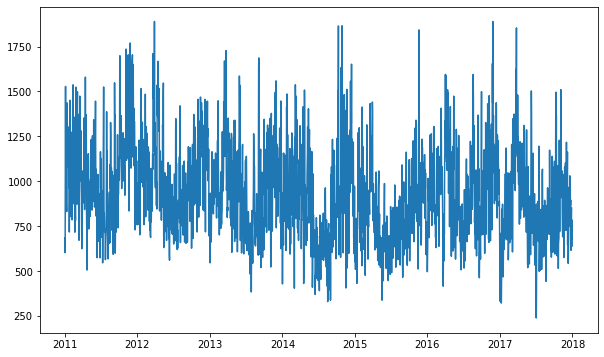

In [0]:
plt.plot(CiudadF2)

## otro


In [0]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    ## Prueba de Dickey-fuller: esta es una de las pruebas estadísticas para verificar la estacionariedad. 
    #Primero consideramos la hipótesis nula: la serie temporal no es estacionaria. 
    #El resultado del resto contendrá la estadística de prueba y el valor crítico para diferentes niveles de 
    #confianza. La idea es tener estadísticas de prueba inferiores al valor crítico, en este caso podemos rechazar 
    #la hipótesis nula y decir que esta serie de tiempo es estacionaria
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

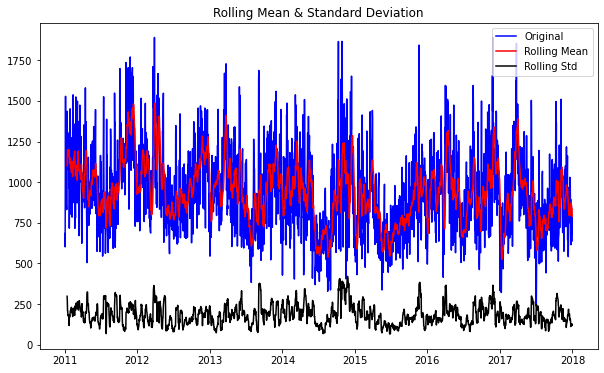

Results of Dickey-Fuller Test:
Test Statistic                   -4.852693
p-value                           0.000043
#Lags Used                       27.000000
Number of Observations Used    2529.000000
Critical Value (1%)              -3.432938
Critical Value (5%)              -2.862684
Critical Value (10%)             -2.567379
dtype: float64


In [0]:
ts=CiudadF2.iloc[:,0]
test_stationarity(ts)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

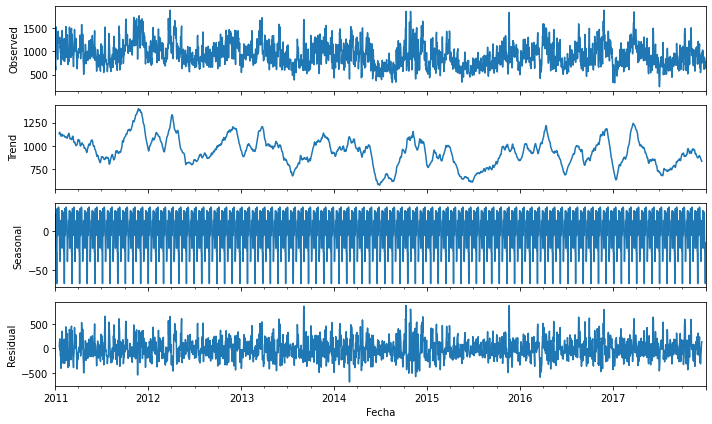

In [0]:
descomposicion = sm.tsa.seasonal_decompose(CiudadF2,model='additive', freq=30)  
fig = descomposicion.plot()

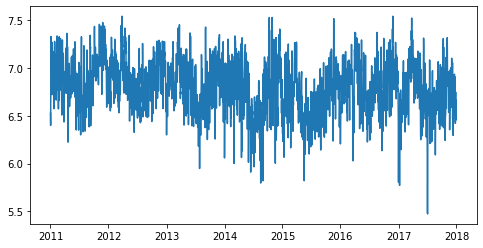

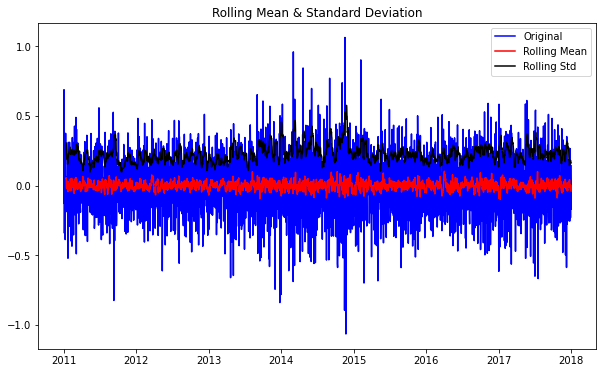

Results of Dickey-Fuller Test:
Test Statistic                -1.401643e+01
p-value                        3.635867e-26
#Lags Used                     2.700000e+01
Number of Observations Used    2.528000e+03
Critical Value (1%)           -3.432939e+00
Critical Value (5%)           -2.862684e+00
Critical Value (10%)          -2.567379e+00
dtype: float64


In [0]:
ts_log = np.log(ts)
plt.figure(figsize=(8,4))
plt.plot(ts_log)
plt.figure()
ts_log_diff_shifting = ts_log - ts_log.shift()
ts_log_diff_shifting.dropna(inplace=True)
test_stationarity(ts_log_diff_shifting)

Fecha
2011-01-12    0.303347
2011-01-13    0.120960
2011-01-14   -0.002261
2011-01-15    0.031353
2011-01-16    0.019596
Name: Concentracion, dtype: float64

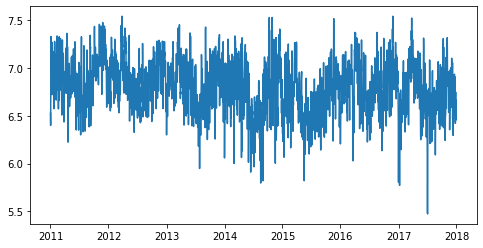

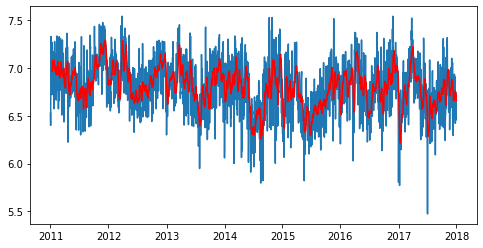

<Figure size 576x288 with 0 Axes>

In [0]:
ts_log = np.log(ts)
plt.figure(figsize=(8,4))
plt.plot(ts_log)


rolmean = ts_log.rolling(window=12).mean() 
plt.figure(figsize = (8,4))
plt.plot(ts_log)
plt.plot(rolmean, 'red')


plt.figure(figsize = (8,4))
ts_log_rolmean_diff = ts_log- rolmean
ts_log_rolmean_diff.head(13)



ts_log_rolmean_diff.dropna(inplace=True)
ts_log_rolmean_diff.head()


In [0]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(ts, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision 

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=34041.594, BIC=34070.801, Fit time=32.764 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=36323.329, BIC=36335.012, Fit time=0.219 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=35468.838, BIC=35492.204, Fit time=9.859 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=34295.283, BIC=34318.649, Fit time=12.857 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=33962.715, BIC=33997.764, Fit time=40.596 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=34936.648, BIC=34965.856, Fit time=15.756 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=34044.263, BIC=34085.154, Fit time=112.506 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=35683.217, BIC=35706.583, Fit time=3.167 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=34047.395, BIC=34094.127, Fit time=107.814 seconds
Fi

In [0]:
pip install pyramid-arima

     |████████████████████████████████| 604kB 3.5MB/s 


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


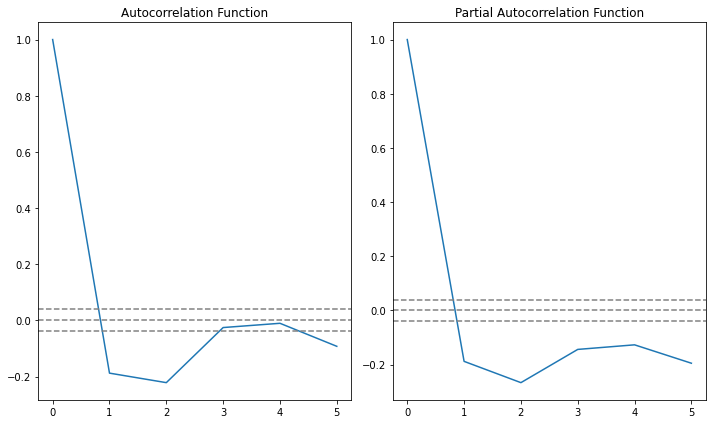

In [0]:
#ACF & PACF plots

lag_acf = acf(ts_log_diff_shifting, nlags=5)
lag_pacf = pacf(ts_log_diff_shifting, nlags=5, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff_shifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff_shifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff_shifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff_shifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()            

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Plotting AR model


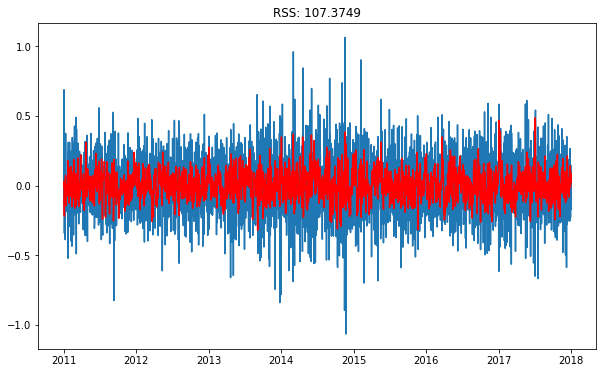

In [0]:
model = ARIMA(ts_log, order=(1,1,1))
results_AR = model.fit(disp=-1)
plt.plot(ts_log_diff_shifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - ts_log_diff_shifting)**2))
print('Plotting AR model')



In [0]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)

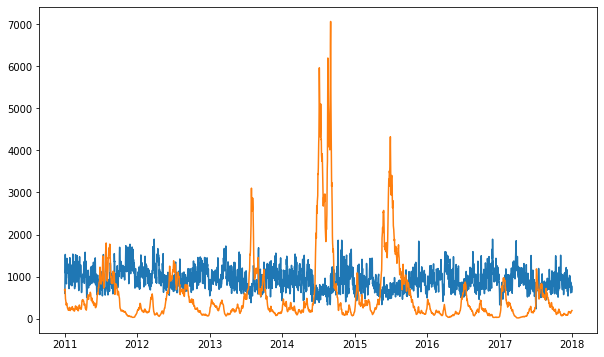

In [0]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)

In [0]:
ts.shape

(2557,)

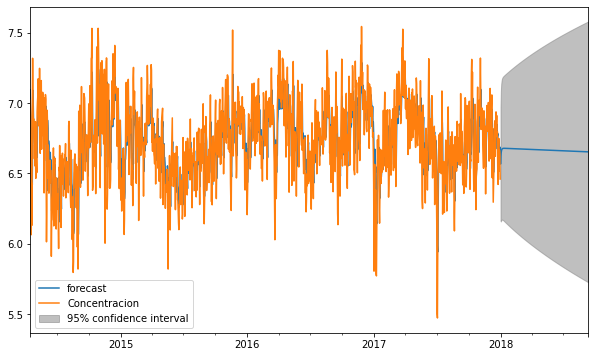

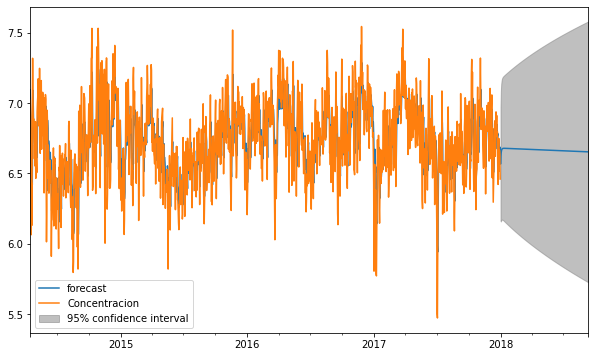

In [0]:
results_AR.plot_predict(1200,2557+253)

In [0]:
#results_AR.forecast(steps=120)

(array([6.56639312, 6.62119581, 6.64937454, 6.66383903, 6.67123917,
        6.67500041, 6.6768872 , 6.67780846, 6.67823235, 6.67840005,
        6.67843578, 6.67840354, 6.67833628, 6.67825098, 6.67815639,
        6.67805701, 6.67795517, 6.67785206, 6.67774829, 6.67764419,
        6.67753991, 6.67743555, 6.67733113, 6.6772267 , 6.67712225,
        6.6770178 , 6.67691334, 6.67680888, 6.67670442, 6.67659996,
        6.6764955 , 6.67639104, 6.67628658, 6.67618212, 6.67607766,
        6.6759732 , 6.67586874, 6.67576428, 6.67565982, 6.67555536,
        6.6754509 , 6.67534644, 6.67524197, 6.67513751, 6.67503305,
        6.67492859, 6.67482413, 6.67471967, 6.67461521, 6.67451075,
        6.67440629, 6.67430183, 6.67419737, 6.67409291, 6.67398845,
        6.67388399, 6.67377953, 6.67367507, 6.67357061, 6.67346615,
        6.67336168, 6.67325722, 6.67315276, 6.6730483 , 6.67294384,
        6.67283938, 6.67273492, 6.67263046, 6.672526  , 6.67242154,
        6.67231708, 6.67221262, 6.67210816, 6.67

**Conclusión:** 

el crecimientoen el numero de clientesmantendra una tendencia creciente en los mese de noviembre y diciembre llegando a estar en rangos de 2 a 5 clientes
